# 2 Part II : Practical application
## 2.1 K-means clustering

In [7]:
import pandas as pd

# (c)
# Load the data
data = pd.read_csv("D:/study/A3/ML_lab4/Live_20210128.csv" )
# Drop the last 4 columns
Live = data.iloc[:, :-4]

# Check the number of observations and variables
num_observations, num_variables = Live.shape
print("Number of Observations:", num_observations)
print("Number of Variables:", num_variables)


Number of Observations: 7050
Number of Variables: 12


In [6]:
# (d) Perform descriptive statistics
Live.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Considering that the variables in the dataset have significantly different scales, for example, 'num_reactions' and 'num_comments' have much larger scales compared to 'num_sads' and 'num_angrys.' Therfore, it is suitable to scale the data before performing clustering so that we can obtain meaningful clusters and ensure that all variables contribute to the clustering process in a balanced way.

In [10]:
# (e)
from sklearn.preprocessing import StandardScaler
# Select the features for clustering
selected_features = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves"]
Live_selected = Live[selected_features]

# Scale the selected data
scaler = StandardScaler()
Live_scaled = scaler.fit_transform(Live_selected)

In [13]:
# (f)
from sklearn.cluster import KMeans

# Perform K-means clustering with K = 4
Live_Kmeans4 = KMeans(n_clusters=4, n_init=50, random_state=1000)
Live_Kmeans4.fit(Live_scaled)
Live_Kmeans4_labels = Live_Kmeans4.labels_

# Calculate the matching matrix
matching_matrix = pd.crosstab(index=Live['status_type'],
                              columns=Live_Kmeans4_labels,
                              rownames=['Real groups'],
                              colnames=['K-means clusters'])

# Display the matching matrix
print(matching_matrix)

K-means clusters     0    1    2    3
Real groups                          
link                49   14    0    0
photo             4063  221    3    1
status             287   78    0    0
video             1516   77  625  116


Cluster 0:
Primarily contains photos (4063) and videos (1516), with a smaller number of links (49) and statuses (287).
Cluster 1:
Primarily consists of photos (221) and videos (77), with some links (14) and statuses (78).
Cluster 2:
Almost exclusively contains videos (625), suggesting that this cluster may represent some unique characteristics common in videos.
Cluster 3:
Primarily consists of videos (116), possibly representing a specific kind of video content.

Photos predominantly populate most clusters, reflecting that photos might have diverse characteristics leading to their wide distribution.

Videos seem to have more specific clusters (2, 3), possibly because videos can vary significantly based on content, length, engagement, etc.

Links and statuses are less prevalent across clusters, maybe due to their lesser variability or lower numbers compared to photos and videos.

These clusters provide insights into how the content of the Facebook posts is categorized based on people's reactions.

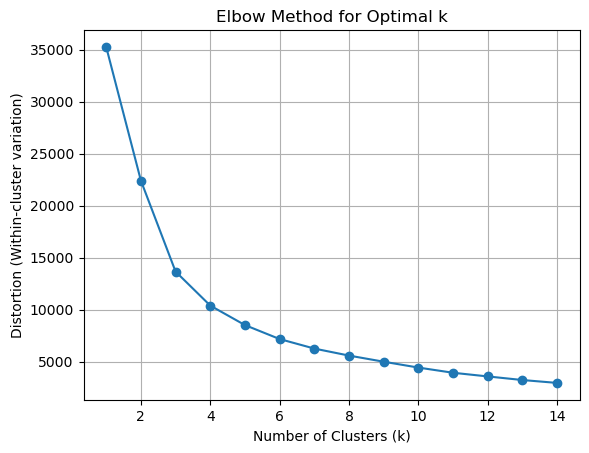

In [16]:
# (g)
import matplotlib.pyplot as plt

distortions = []
K = range(1, 15)

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=50, random_state=1000)
    kmeanModel.fit(Live_scaled)
    distortions.append(kmeanModel.inertia_)

# Plot the distortions
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Within-cluster variation)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [21]:
# (h) 
# Perform K-means clustering with chosen K
Live_Kmeans_optimal = KMeans(n_clusters=6, n_init=50, random_state=1000)
Live_Kmeans_optimal.fit(Live_scaled)
Live_Kmeans_optimal_labels = Live_Kmeans_optimal.labels_

# Calculate the optimal matching matrix
matching_matrix_optimal = pd.crosstab(index=Live['status_type'],
                              columns=Live_Kmeans_optimal_labels,
                              rownames=['Real groups'],
                              colnames=['K-means clusters'])

# Display the matching matrix
print(matching_matrix_optimal)

K-means clusters     0    1    2    3   4   5
Real groups                                  
link                49    9    0    5   0   0
photo             3981  168    2  135   1   1
status             268   70    0   27   0   0
video             1403   98  620   44  76  93


Cluster 0 Primarily contains photos and videos, with a smaller number of links and statuses.

Cluster 1 Primarily consists of photos and videos, with some links and statuses.

Cluster 2, Cluster 4 and Cluster 5 are primarily video clusters.

Cluster 3 show mixed patterns with different post types, but they are not dominated by any specific type. 

Photos predominantly populate most clusters, reflecting that photos might have diverse characteristics leading to their wide distribution.

Videos seem to have more specific clusters (2, 4, 5), possibly because videos can vary significantly based on content, length, engagement, etc.

Links and statuses are less prevalent across clusters, maybe due to their lesser variability or lower numbers compared to photos and videos.

These clusters provide insights into how the content of the Facebook posts is categorized based on people's reactions.

## 2.2 Hierarchical clustering

In [22]:
# (a)
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Perform hierarchical clustering with complete linkage
hc_complete = linkage(Live_scaled, "complete")

# Cut the dendrogram into 4 clusters
clusters_4 = cut_tree(hc_complete, n_clusters=4).flatten()

# Calculate the matching matrix
matching_matrix = pd.crosstab(index=Live["status_type"], columns=clusters_4, rownames=["Real groups"], colnames=["Clusters"])
print(matching_matrix)


Clusters        0  1   2  3
Real groups                
link           63  0   0  0
photo        4288  0   0  0
status        365  0   0  0
video        2264  3  66  1


Cluster 0 Primarily contains photos and videos, with a smaller number of links and statuses.

Cluster 1 Almost exclusively contains videos (3).

Cluster 2 Almost exclusively contains videos (66).

Cluster 3 Almost exclusively contains videos (only 1). 

The hierarchical clustering with complete linkage predominantly places most of the posts into a single cluster (Cluster 0), and only a small portion of the data is assigned to the other clusters.
A different approach or further parameter tuning might be necessary to achieve a more meaningful and differentiated clustering of the posts.

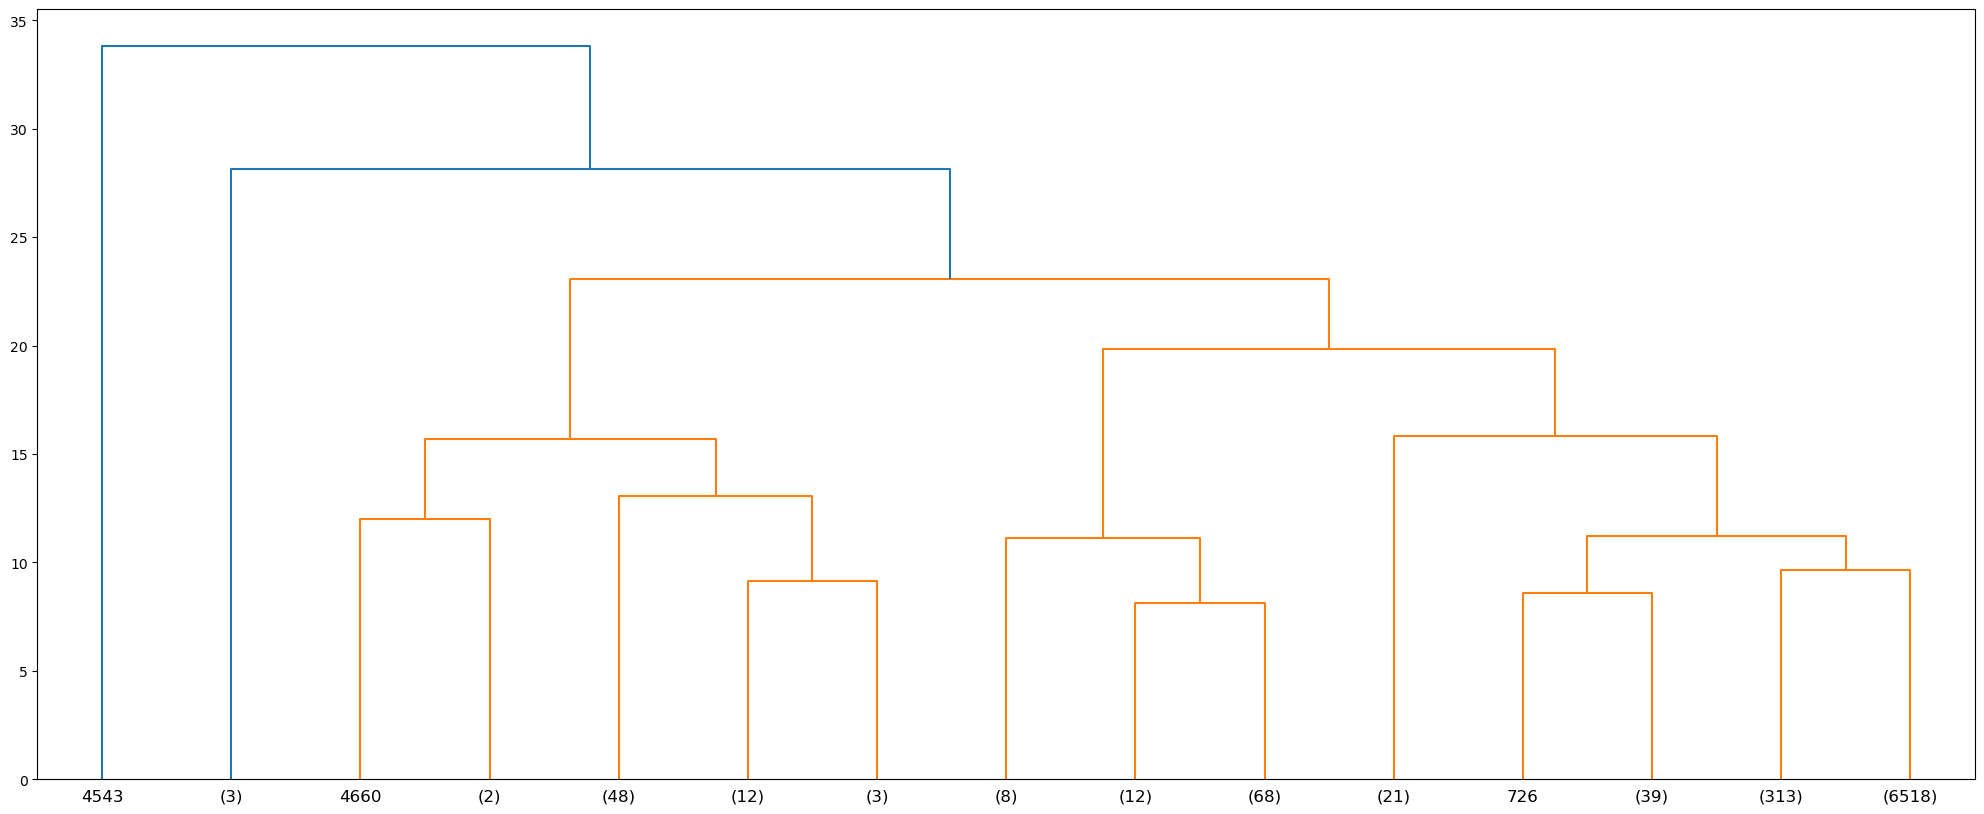

In [23]:
# (b)Plot the dendrogram

plt.figure(figsize=(25, 10))
dendrogram(hc_complete, truncate_mode='lastp', p=15)
plt.show()

Cutting the dendrogram to form **2 clusters** seems to be a reasonable choice as it corresponds to the highest vertical line without any horizontal line crossing. It divides the data into two substantial groups which could represent a high-level categorization of the data.

But if we need a more detailed separation based on the data's inherent characteristics, 3 clusters might be the better choice

In [30]:
#(c)
from sklearn.metrics import silhouette_score, davies_bouldin_score
# K-means
# Perform K-means clustering with K = 6
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=1000, n_init=10)
kmeans_labels = kmeans.fit_predict(Live_scaled)

# Calculate Silhouette coefficient and Davies-Bouldin index for K-means clustering
silhouette_kmeans = silhouette_score(Live_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(Live_scaled, kmeans_labels)

print("Silhouette coefficient for K-means:", silhouette_kmeans)
print("Davies-Bouldin index for K-means:", davies_bouldin_kmeans)

Silhouette coefficient for K-means: 0.7442179164061047
Davies-Bouldin index for K-means: 0.7782391243473249


In [25]:
# Hierarchical clustering
# Perform hierarchical clustering with K = 6
hc = linkage(Live_scaled, method='complete')
hc_labels = cut_tree(hc, n_clusters=6).flatten()

# Calculate Silhouette coefficient and Davies-Bouldin index for hierarchical clustering
silhouette_hc = silhouette_score(Live_scaled, hc_labels)
davies_bouldin_hc = davies_bouldin_score(Live_scaled, hc_labels)

print("Silhouette coefficient for Hierarchical clustering:", silhouette_hc)
print("Davies-Bouldin index for Hierarchical clustering:", davies_bouldin_hc)

Silhouette coefficient for Hierarchical clustering: 0.7755612208382886
Davies-Bouldin index for Hierarchical clustering: 0.5632304993166416


**1. Silhouette Coefficient:**
**K-means:** 
0.7442

**Hierarchical clustering:**
0.7756

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Since the Silhouette Coefficient for Hierarchical clustering is higher, it suggests that the data points are closer to the centroid of their assigned clusters and farther away from other clusters compared to K-means.

**2. Davies-Bouldin Index:**

**K-means:**
0.7782

**Hierarchical clustering:** 
0.5632

A lower Davies-Bouldin index relates to a model with better separation between the clusters. Hierarchical clustering has a lower Davies-Bouldin index, indicating a better separation of clusters compared to K-means.

Hierarchical clustering appears to perform better than K-means for K=6 based on the evaluation metrics. Hierarchical clustering has a higher Silhouette Coefficient and a lower Davies-Bouldin Index, indicating better-defined clusters with this method for the given data. This suggests that the hierarchical method might be capturing the underlying structures in the data more effectively than the K-means in this case.